In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('credit card.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
fill= df['AGE'].median()

In [7]:
df.AGE = df.AGE.fillna(fill)

In [8]:
df.AGE

0        24.0
1        26.0
2        34.0
3        34.0
4        57.0
         ... 
29995    39.0
29996    43.0
29997    37.0
29998    41.0
29999    46.0
Name: AGE, Length: 30000, dtype: float64

In [9]:
X = df.drop(['default.payment.next.month'],axis=1)

In [10]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,34.0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [11]:
y= df['default.payment.next.month']

In [12]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [13]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [25]:
#Train Model 
import seaborn
from sklearn.svm import SVC
r=SVC(gamma='auto')
r.fit(X_train, y_train)

SVC(gamma='auto')

In [26]:
#predict
pred2= r.predict(X_test)

In [27]:
r.score(X_test,y_test)

0.7777777777777778

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
accuracy_score(y_test,pred2)

0.7777777777777778

In [29]:
confusion_matrix(y_test,pred2)

array([[7000,    0],
       [2000,    0]], dtype=int64)

In [30]:
classification_report(y_test,pred1)

NameError: name 'pred1' is not defined

In [ ]:
print(classification_report(y_test,pred1))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

In [ ]:
pred1 = rf.predict(X_test)
rf.score(X_test,y_test

In [ ]:
accuracy_score(y_test,pred1)

In [ ]:
confusion_matrix(y_test,pred1)

In [ ]:
classification_report(y_test,pred1)

In [ ]:
print(classification_report(y_test,pred1))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

In [ ]:
pred1 = rf.predict(X_test)
rf.score(X_test,y_test)

In [ ]:
accuracy_score(y_test,pred1)

In [ ]:
confusion_matrix(y_test,pred1)

In [ ]:
classification_report(y_test,pred1)

In [ ]:
print(classification_report(y_test,pred1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train, y_train)

In [42]:
pred2=d.predict(X_test)
d.score(X_test,y_test)

NameError: name 'd' is not defined

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [43]:
accuracy_score(y_test,pred2)

0.7777777777777778

In [44]:
confusion_matrix(y_test,pred2)

array([[7000,    0],
       [2000,    0]], dtype=int64)

In [48]:
classification_report(y_test,pred2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.78      1.00      0.88      7000\n           1       0.00      0.00      0.00      2000\n\n    accuracy                           0.78      9000\n   macro avg       0.39      0.50      0.44      9000\nweighted avg       0.60      0.78      0.68      9000\n'

In [49]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [51]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
gnb.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
gnb.score(X_test,y_test)

0.37744444444444447

In [53]:
from sklearn.naive_bayes import BernoulliNB

#Create a Gaussian Classifier
bnb = BernoulliNB()

In [54]:
#Train the model using the training sets
bnb.fit(X_train, y_train)

#Predict the response for test dataset
bnb.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
bnb.score(X_test,y_test)

0.771

In [56]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()

In [57]:
#Train the model using the training sets
#mnb.fit(X_train, y_train)

#Predict the response for test dataset
#mnb.predict(X_test)

In [58]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [59]:
from sklearn import metrics

In [60]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [61]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [62]:
import matplotlib.pyplot as plt

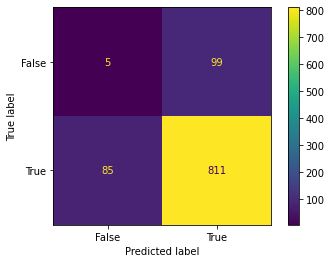

In [63]:
cm_display.plot()
plt.show()

In [77]:
from sklearn import tree
import pandas
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [78]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(253.35950061519475, 215.024, 'X[6] <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(200.29138275966406, 210.192, 'X[7] <= 1.5\ngini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(126.54483132719409, 205.35999999999999, 'X[20] <= 678.5\ngini = 0.245\nsamples = 24599\nvalue = [21085, 3514]'),
 Text(56.39851298195115, 200.528, 'X[12] <= 530.0\ngini = 0.339\nsamples = 6776\nvalue = [5312, 1464]'),
 Text(30.164326830040483, 195.696, 'X[21] <= 3.5\ngini = 0.4\nsamples = 2664\nvalue = [1929, 735]'),
 Text(22.207915579948445, 190.864, 'X[5] <= 55.5\ngini = 0.427\nsamples = 1645\nvalue = [1136, 509]'),
 Text(12.921219212008243, 186.032, 'X[1] <= 25000.0\ngini = 0.419\nsamples = 1583\nvalue = [1111, 472]'),
 Text(1.17058462181729, 181.2, 'X[13] <= 102.0\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(0.8501452560684228, 176.368, 'X[22] <= 651.0\ngini = 0.493\nsamples = 52\nvalue = [23, 29]'),
 Text(0.7455119937830785, 171.536, 'X[0] <= 28991.5\ngini = 

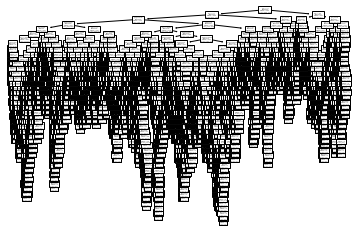

In [79]:
tree.plot_tree(clf)

In [80]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [81]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [82]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8124444444444444
